In [24]:
import json
import pandas as pd
import numpy as np
from datetime import datetime
from datetime import timedelta
from datetime import date

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker

import seaborn as sns

# Linear Regression to verify implementation
from sklearn.linear_model import LinearRegression
from sklearn.utils import resample

# Scipy for statistics
import scipy

# PyMC3 for Bayesian Inference
import pymc3 as pm

%matplotlib inline

## 1. Populate Dataframes

In [25]:
# read from csv files
 
topicsDF = pd.read_csv(r'topics.csv',encoding='latin-1')

wf_twitterDF = pd.read_csv(r'twitter_wf_textblob - manual_update.csv',encoding='latin-1')
sap_twitterDF = pd.read_csv(r'twitter_sap_textblob - manual_update.csv',encoding='latin-1')

In [26]:
# Total number for each company
print("WF Tweets: "+ str(wf_twitterDF.size))

print("SAP Tweets: "+ str(sap_twitterDF.size))

WF Tweets: 11388
SAP Tweets: 13624


In [27]:
wf_twitterDF['sourceDate'] = wf_twitterDF['sourceDate'].astype('datetime64[ns]') 

In [28]:
wf_twitterDF.reset_index(drop=True)
wf_twitterDF.set_index('sourceDate')


,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,id,text,URL,createdTimestamp,quoteCount,replyCount,retweetCount,...,lang,isRelated,source,NP,isInReplyTo,user_id,vader_compound,vader_sentiment,tb_polarity,tb_sentiment
sourceDate,,,,,,,,,,,,,,,,,,,,,
2019-09-29,213,255,255,5dae74f611bb5a25b06906f2,The Board of \nhas TOTALLY lost it.\nNew CEO w...,https://t.co/gqW2h4NW9T,9/29/2019 17:17,0,0,0,...,en,Y,WF,N,0,2.135718e+07,-0.7663,N,-0.128409,E
2019-09-28,154,189,189,5dae74ce11bb5a25b06906b0,Wells Fargo new CEO is just as Evil as the las...,NaN,9/28/2019 16:10,0,0,0,...,en,Y,WF,N,0,1.853485e+07,-0.6776,N,-0.287879,E
2019-09-27,45,49,49,5dab73cd11bb5a1f6c86dfee,Wells Fargo names outsider as new CEO three ye...,https://t.co/TZWr8e5raO,9/27/2019 22:35,0,0,0,...,en,Y,WF,NaN,0,1.125933e+08,-0.6124,N,-0.181818,E
2019-09-27,0,0,0,5dab73ca11bb5a1f6c86dfbd,Wells Fargo names outsider as new CEO three ye...,https://t.co/WBtIAtX8Gf,9/27/2019 23:51,2,0,0,...,en,Y,WF,NaN,0,4.867858e+09,-0.6124,N,-0.181818,E
2019-09-28,175,211,211,5dae74d011bb5a25b06906c6,Wells Fargo names outsider as new CEO three ye...,https://t.co/VOnrw8hF8R,9/28/2019 14:20,0,0,0,...,en,Y,WF,NaN,0,3.067629e+08,-0.6124,N,-0.181818,E
2019-10-01,360,426,426,5dae756511bb5a25b069079d,So Wells Fargo chose a rent-a-ceo rather than ...,https://t.co/awCUgOdz2G,10/1/2019 21:30,0,0,0,...,en,Y,WF,N,0,9.490000e+17,-0.5434,N,0.000000,E
2019-09-30,291,348,348,5dae751911bb5a25b069074f,WELLS FARGO NOMBRA NUEVO CEO PARA ENMENDAR CRI...,NaN,9/30/2019 18:48,0,0,0,...,es,Y,WF,NaN,0,3.724730e+08,-0.4767,E,0.000000,E
2019-10-01,396,474,474,5dae756811bb5a25b06907cd,WELLS FARGO NOMBRA NUEVO CEO PARA ENMENDAR CRI...,NaN,10/1/2019 10:49,0,0,0,...,es,Y,WF,NaN,0,4.277073e+09,-0.4767,E,0.000000,E
2019-10-01,413,491,491,5dae756a11bb5a25b06907de,WELLS FARGO NOMBRA NUEVO CEO PARA ENMENDAR CRI...,NaN,10/1/2019 1:30,0,0,0,...,es,Y,WF,NaN,0,3.229112e+09,-0.4767,E,0.000000,E


In [29]:
sap_twitterDF['sourceDate'] = sap_twitterDF['sourceDate'].astype('datetime64[ns]') 

In [30]:
sap_twitterDF.reset_index(drop=True)
sap_twitterDF.set_index('sourceDate')

,Unnamed: 0,Unnamed: 0.1,Unnamed: 0.1.1,id,text,URL,createdTimestamp,quoteCount,replyCount,retweetCount,...,lang,isRelated,source,NP,isInReplyTo,user_id,vader_compound,vader_sentiment,tb_polarity,tb_sentiment
sourceDate,,,,,,,,,,,,,,,,,,,,,
2019-10-09,0,619,619,5dae77e811bb5a25b069085e,"Experience Management: ""Start with empathy for...",NaN,2019-10-09 18:10:03,0,0,0,...,en,Y,SAP,NaN,0.0,2.593419e+08,0.0000,E,0.000000,E
2019-10-09,1,621,621,5dae77e811bb5a25b0690860,"Experience Management: ""Start with empathy for...",https://t.co/t0MxMZ5DxI,2019-10-09 18:00:01,0,0,2,...,en,Y,SAP,NaN,0.0,3.266873e+08,0.0000,E,0.000000,E
2019-10-09,2,633,633,5dae77e911bb5a25b069086c,SAP CEO has made clear: the new economy is he...,https://t.co/tqPgEZix2U,2019-10-09 14:36:00,0,0,0,...,en,Y,SAP,NaN,0.0,1.105129e+08,0.1027,E,0.078788,E
2019-10-09,3,643,643,5dae77e911bb5a25b0690876,Thanks for hosting Bill Mcdermott CEO of SAP ...,NaN,2019-10-09 05:21:42,0,0,0,...,en,Y,SAP,NaN,0.0,1.024890e+18,0.7184,P,0.200000,E
2019-10-10,4,645,645,5dae784011bb5a25b0690878,"New article: ""SAP CEO Bill McDermott stepping ...",https://t.co/DoQvIY7sVy,2019-10-10 23:58:48,0,0,0,...,en,Y,SAP,NaN,0.0,7.297547e+17,0.0000,E,-0.006397,E
2019-10-10,5,646,646,5dae784011bb5a25b0690879,Breaking News: CEO Bill McDermott Resigns; Mo...,https://t.co/9hqI0mTsGm,2019-10-10 23:58:38,0,0,5,...,en,Y,SAP,NaN,0.0,1.463898e+07,-0.3182,E,0.000000,E
2019-10-10,6,647,647,5dae784011bb5a25b069087a,Sad but happy to offer a sincere thank you to ...,https://t.co/tpOtGChF5q,2019-10-10 23:58:27,0,0,0,...,en,Y,SAP,P,0.0,3.951284e+09,0.8957,P,0.425000,E
2019-10-10,7,648,648,5dae784111bb5a25b069087b,SAP said CEO Bill McDermott wouldnÃÂ¢ÃÂÃÂ...,NaN,2019-10-10 23:58:19,0,0,0,...,en,Y,SAP,NaN,0.0,3.772019e+08,0.0000,E,0.000000,E
2019-10-10,8,649,649,5dae784111bb5a25b069087c,Bill McDermott steps down as SAPÃÂ¢ÃÂÃÂs ...,https://t.co/herfof3ldl,2019-10-10 23:58:13,0,0,0,...,en,Y,SAP,NaN,0.0,2.708690e+08,0.0000,E,-0.155556,E


In [31]:
# Weight the vader compound and tb_polarity data by quote, reply and retweet count. 

wf_twitterDF['vader_weighted'] = wf_twitterDF.apply(lambda row: row.vader_compound * (1 + row.favoriteCount + row.quoteCount + row.replyCount + row.retweetCount), axis = 1) 
wf_twitterDF['tb_weighted'] = wf_twitterDF.apply(lambda row: row.tb_polarity * (1 + row.favoriteCount + row.quoteCount + row.replyCount + row.retweetCount), axis = 1) 


In [32]:

# Weight the vader compound and tb_polarity data by quote, reply and retweet count. 

sap_twitterDF['vader_weighted'] = sap_twitterDF.apply(lambda row: row.vader_compound * (1 + row.favoriteCount + row.quoteCount + row.replyCount + row.retweetCount), axis = 1) 
sap_twitterDF['tb_weighted'] = sap_twitterDF.apply(lambda row: row.tb_polarity * (1 + row.favoriteCount + row.quoteCount + row.replyCount + row.retweetCount), axis = 1) 

### 1.1. Populate dataframe with means

In [33]:
sap_mean_v = sap_twitterDF.groupby('sourceDate')['vader_weighted'].mean().to_frame()

In [34]:
wf_mean_v = wf_twitterDF.groupby('sourceDate')['vader_weighted'].mean().to_frame()

In [35]:
sap_mean_tb = sap_twitterDF.groupby('sourceDate')['tb_weighted'].mean().to_frame()

In [36]:
wf_mean_tb = wf_twitterDF.groupby('sourceDate')['tb_weighted'].mean().to_frame()

### 1.2 Join with Stock price

In [37]:
# read from csv files
 
WF_stock = pd.read_csv(r'./Stock_Price/wFC_limited.csv',encoding='latin-1')
WF_stock['Date'] = WF_stock['Date'].astype('datetime64[ns]') 

WF_stock.reset_index(drop=True)
WF_stock.set_index('Date') 

WF_stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-09-25,48.730000,49.540001,48.650002,49.259998,48.793034,21313100
1,2019-09-26,49.250000,49.369999,48.820000,48.869999,48.406731,19984000
2,2019-09-27,50.400002,51.410000,50.250000,50.709999,50.229290,59467400
3,2019-09-30,50.770000,50.849998,50.060001,50.439999,49.961849,26897100
4,2019-10-01,50.650002,50.779999,49.000000,49.060001,48.594933,27249300


In [38]:
SAP_stock = pd.read_csv(r'./Stock_Price/SAP_limited.csv',encoding='latin-1')
SAP_stock['Date'] = SAP_stock['Date'].astype('datetime64[ns]') 

SAP_stock.reset_index(drop=True)
SAP_stock.set_index('Date') 

SAP_stock.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-10-09,115.849998,116.739998,115.580002,116.050003,116.050003,1061600
1,2019-10-10,114.959999,116.160004,114.559998,115.250000,115.250000,1062100
2,2019-10-11,125.720001,127.900002,125.470001,126.199997,126.199997,2234300
3,2019-10-14,125.940002,126.559998,125.739998,126.050003,126.050003,877700
4,2019-10-15,125.830002,127.889999,125.470001,127.180000,127.180000,830900


In [42]:
# join tables by sourceDate and Date
# WF Vader weighted score
result = pd.merge(wf_mean_v, WF_stock, left_on='sourceDate', right_on='Date') # how='right', 
wf_v_mean_stock = result 

In [43]:
# join tables by sourceDate and Date
# SAP Vader weighted score
result = pd.merge(sap_mean_v, SAP_stock, left_on='sourceDate', right_on='Date') # how='right', 
sap_v_mean_stock = result 

In [44]:
# join tables by sourceDate and Date
# WF Textblob weighted score
wf_tb_mean_stock = pd.merge(wf_mean_tb, WF_stock, left_on='sourceDate', right_on='Date') # how='right', 
 

In [45]:
# join tables by sourceDate and Date
# SAP Textblob weighted score
sap_tb_mean_stock = pd.merge(sap_mean_tb, SAP_stock, left_on='sourceDate', right_on='Date') # how='right', 
 

## 2. Regression Plot

Regression plot for WF Weighted Vader compound score mean against stock closing price

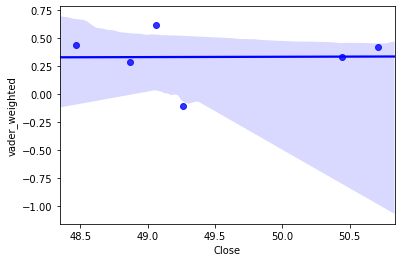

In [46]:
sns.regplot(y=wf_v_mean_stock['vader_weighted'], x=wf_v_mean_stock['Close'],  fit_reg = True, color='blue')

Regression plot for WF Weighted TextBlob Polarity mean against stock closing price

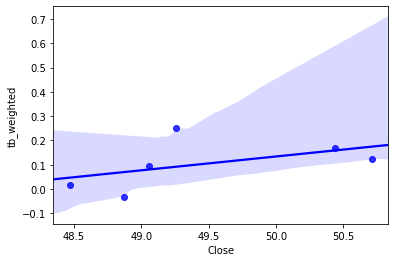

In [47]:
sns.regplot(y=wf_tb_mean_stock['tb_weighted'], x=wf_tb_mean_stock['Close'],  fit_reg = True, color='blue')

Regression plot for SAP Weighted Vader compound score mean against stock closing price

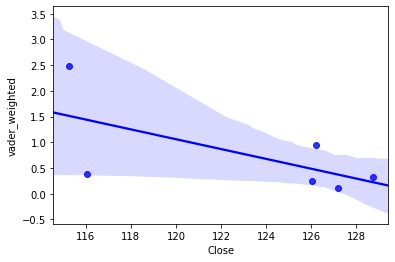

In [48]:
sns.regplot(y=sap_v_mean_stock['vader_weighted'], x=sap_v_mean_stock['Close'],  fit_reg = True, color='blue')

Regression plot for SAP Weighted TextBlob Polarity score mean against stock closing price

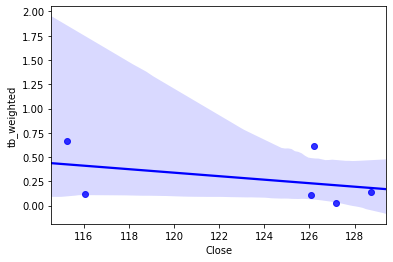

In [49]:
sns.regplot(y=sap_tb_mean_stock['tb_weighted'], x=sap_tb_mean_stock['Close'],  fit_reg = True, color='blue')